# Projet de Machine Learning

# Jeu de données

Les données proviennent du concours KAGGLE et font partie du jeu de données intitulé "Gym Members Exercise Dataset", accessible ici : [Gym Members Exercise Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset).

Ce jeu de données offre un aperçu détaillé des habitudes d'exercice, des caractéristiques physiques et des indicateurs de condition physique des membres d’une salle de sport. Il comprend 15 variables observées chez 973 individus fréquentant une salle de sport :

- **Age** : Âge du membre.
- **Gender** : Sexe du membre (variable qualitative avec deux catégories : homme ou femme).
- **Weight_kg** : Poids en kilogrammes.
- **Height_m** : Taille en mètres.
- **Max_BPM** : Fréquence cardiaque maximale (en battements par minute) atteinte pendant les séances d’entraînement.
- **Avg_BPM** : Fréquence cardiaque moyenne durant les séances d’entraînement.
- **Resting_BPM** : Fréquence cardiaque au repos avant l’entraînement.
- **Session_Duration_hours** : Durée de chaque séance d’entraînement en heures.
- **Calories_Burned** : Nombre total de calories brûlées lors de chaque séance.
- **Workout_Type** : Type d’entraînement pratiqué (variable qualitative avec 4 catégories : cardio, musculation, yoga, HIIT).
- **Fat_Percentage** : Pourcentage de masse grasse du membre.
- **Water_Intake_liters** : Quantité d’eau consommée quotidiennement pendant les séances d’entraînement.
- **Workout_Frequency_days_week** : Nombre de séances d’entraînement hebdomadaires (variable qualitative avec 4 catégories : de 2 à 5 séances).
- **Experience_Level** : Niveau d’expérience (variable qualitative avec 3 niveaux : 1 pour débutant, 3 pour expert).
- **BMI** : Indice de masse corporelle (IMC), calculé à partir du poids et de la taille.

L'objectif de ce projet est d'abord de prédire la variable **Calories_Burned** en fonction des autres variables, puis d'estimer la variable **Experience_Level** en utilisant toutes les autres variables disponibles, y compris **Calories_Burned**.


## 1. Analyse exploratoire des données
L’objectif dans un premier temps est d’explorer les différentes variables, étape préliminaire indispensable à
l’analyse. Ci-dessous sont précisées quelques questions basiques. Vous pouvez compléter l’analyse selon vos
propres idées.
* Commencez par vérifier la nature des différentes variables et leur encodage. N’oubliez pas de convertir
toutes les variables qualitatives.
* Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?
* Poursuivez avec une analyse descriptive bidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles,
mosaicplot... Quelles variables semblent liées ?
* Réalisez une analyse en composantes principales des variables explicatives quantitatives et interprétez les
résultats. Visualisez les dépendances éventuelles entre les variables à prédire et les variables explicatives.

Cette analyse a été réalisé en R

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, log
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [9]:
path=""
data=pd.read_csv(path+"gym_members_exercise_tracking.csv",sep=",",header=0)
# Vérification du contenu
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [11]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [12]:
data['Gender'] = data['Gender'].astype('category')
data['Workout_Type'] = data['Workout_Type'].astype('category')
data['Workout_Frequency (days/week)'] = data['Workout_Frequency (days/week)'].astype('category')
data['Experience_Level'] = data['Experience_Level'].astype('category')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            973 non-null    int64   
 1   Gender                         973 non-null    category
 2   Weight (kg)                    973 non-null    float64 
 3   Height (m)                     973 non-null    float64 
 4   Max_BPM                        973 non-null    int64   
 5   Avg_BPM                        973 non-null    int64   
 6   Resting_BPM                    973 non-null    int64   
 7   Session_Duration (hours)       973 non-null    float64 
 8   Calories_Burned                973 non-null    float64 
 9   Workout_Type                   973 non-null    category
 10  Fat_Percentage                 973 non-null    float64 
 11  Water_Intake (liters)          973 non-null    float64 
 12  Workout_Frequency (days/week)  973 n

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [13]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,49.840000


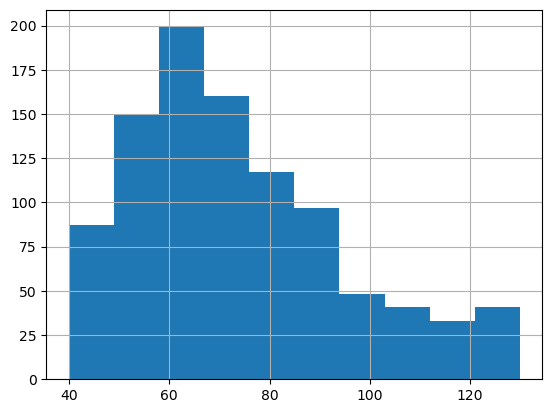

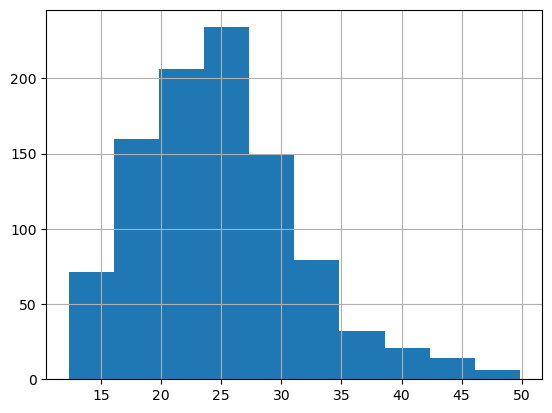

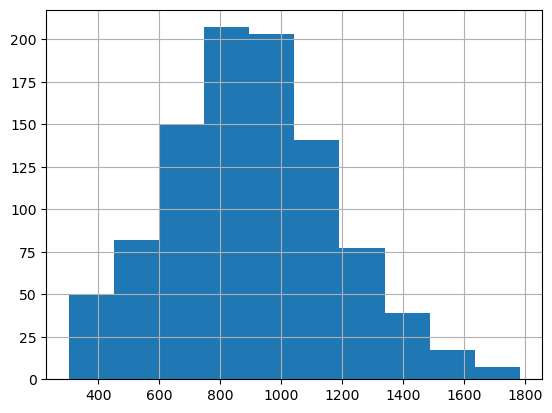

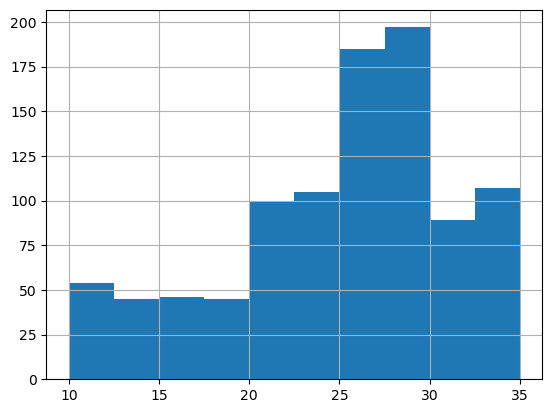

In [17]:
data["Weight (kg)"].hist()
plt.show()
data["BMI"].hist()
plt.show()
data["Calories_Burned"].hist()
plt.show()
data["Fat_Percentage"].hist()
plt.show()

In [18]:
data["Weight (kg)"]=data["Weight (kg)"].map(lambda x: log(x))
data["BMI"]=data["BMI"].map(lambda x: log(x))
data["Calories_Burned"]=data["Calories_Burned"].map(lambda x: sqrt(x))
data["Fat_Percentage"]=data["Fat_Percentage"].map(lambda x: x**2)

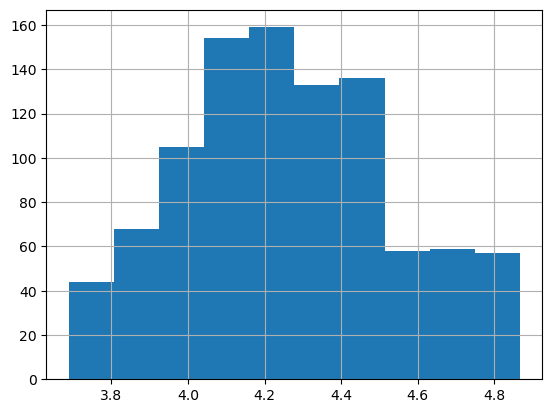

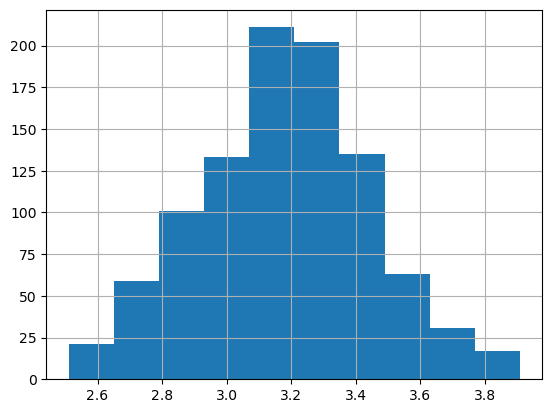

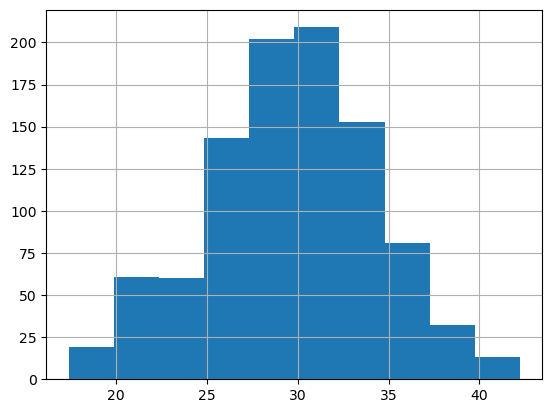

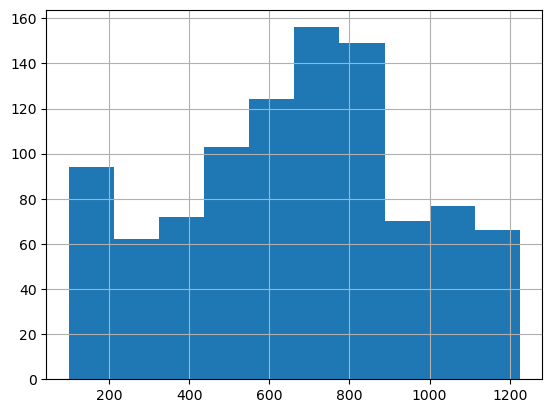

In [19]:
data["Weight (kg)"].hist()
plt.show()
data["BMI"].hist()
plt.show()
data["Calories_Burned"].hist()
plt.show()
data["Fat_Percentage"].hist()
plt.show()

In [35]:
dataDum=pd.get_dummies(data[["Gender","Workout_Type","Workout_Frequency (days/week)","Experience_Level"]])
dataQuant=data[["Age","Weight (kg)","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","BMI"]]
dfC=pd.concat([dataDum,dataQuant],axis=1)
dfC.head()

,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Workout_Frequency (days/week)_2,Workout_Frequency (days/week)_3,Workout_Frequency (days/week)_4,Workout_Frequency (days/week)_5,...,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),BMI
0,False,True,False,False,False,True,False,False,True,False,...,56,4.480740,1.71,180,157,60,1.69,158.76,3.5,3.407842
1,True,False,False,True,False,False,False,False,True,False,...,46,4.316154,1.53,179,151,66,1.30,1149.21,2.1,3.465736
2,True,False,True,False,False,False,False,False,True,False,...,32,4.220977,1.66,167,122,54,1.11,1115.56,2.3,3.207208
3,False,True,False,False,True,False,False,True,False,False,...,25,3.974058,1.70,190,164,56,0.59,829.44,2.1,2.912894
4,False,True,False,False,True,False,False,True,False,False,...,38,3.830813,1.79,188,158,68,0.64,852.64,2.8,2.666534


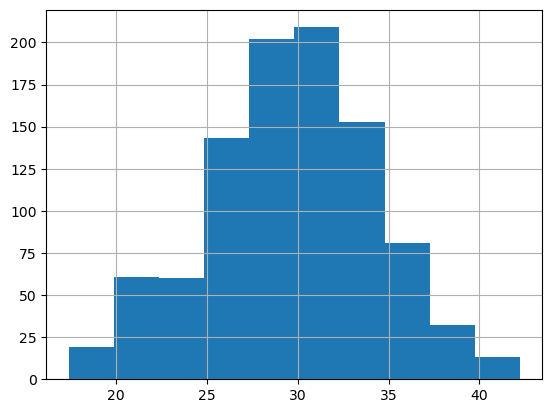

In [36]:
Yc=data["Calories_Burned"]
Yc.hist()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Yc_train,Yc_test=train_test_split(dfC,Yc,test_size=0.2,random_state=11)

In [38]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
Xc_train = scaler.transform(X_train)  
Xc_test = scaler.transform(X_test)

**régression avec choix de modèle par régularisation avec une pénalisation lasso**

In [39]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(Xc_train,Yc_train)
prev=regLasso.predict(Xc_test)
print("MSE=",mean_squared_error(Yc_test,prev))

MSE= 3.721532549873231


In [40]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yc_test,prev))

R2= 0.8492710764523868


**Optimisation du paramètre de pénalisation Lasso par validation croisée**

In [41]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xc_train, Yc_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.982583, Meilleur paramètre = {'alpha': 0.05}


**Tracé des résidus**

In [55]:
prev=regLassOpt.predict(Xc_test)
print("MSE=",mean_squared_error(prev,Yc_test))
print("R2=",r2_score(Yc_test,prev))

MSE= 0.33473164497121183
R2= 0.9864427517836566


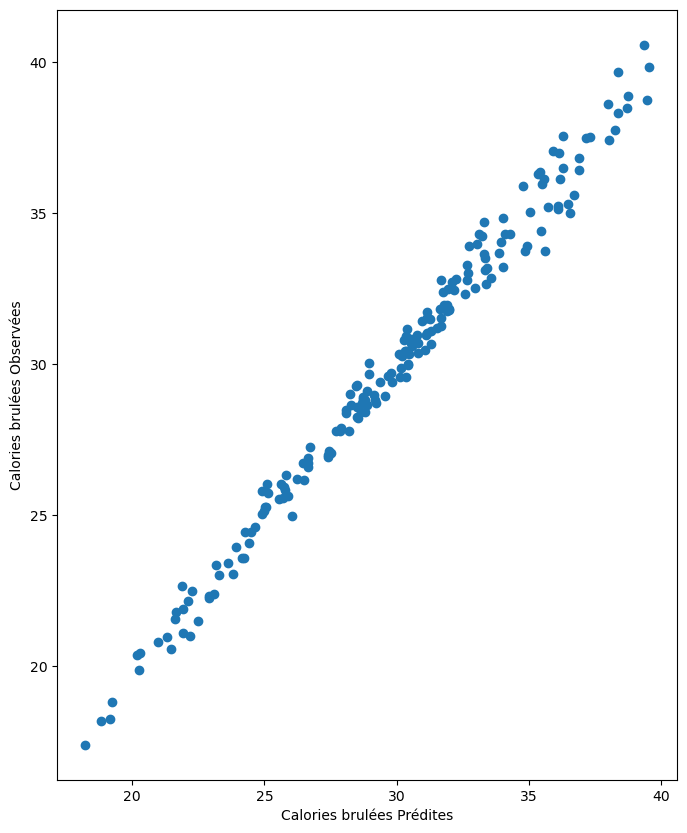

In [56]:
plt.plot(prev,Yc_test,"o")
plt.xlabel("Calories brulées Prédites")
plt.ylabel("Calories brulées Observées")
plt.show()

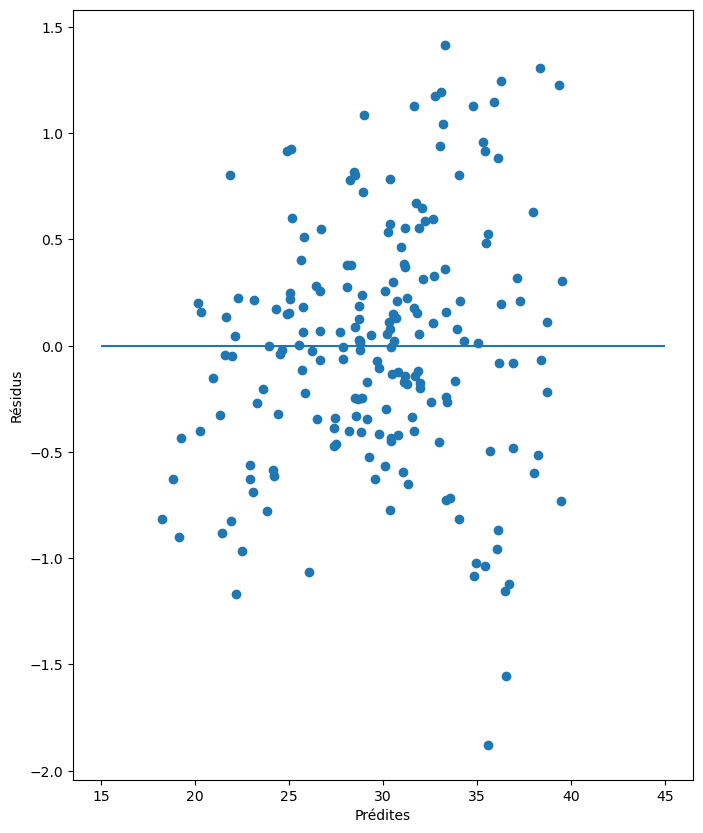

In [57]:
plt.plot(prev,Yc_test-prev,"o")
plt.xlabel("Prédites")
plt.ylabel("Résidus")
plt.hlines(0,15,45)
plt.show()

In [47]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xc_train,Yc_train)
model_lasso.coef_

array([-6.55193822e-01,  1.15075045e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.29068007e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.19225460e-01,
       -1.14938182e-01, -6.06580587e-01,  3.03193337e-03,  0.00000000e+00,
        0.00000000e+00,  1.42883346e+00,  0.00000000e+00,  4.16193462e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [58]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 9 variables et en supprime 14


Text(0.5, 1.0, 'Coefficients du modèle lasso')

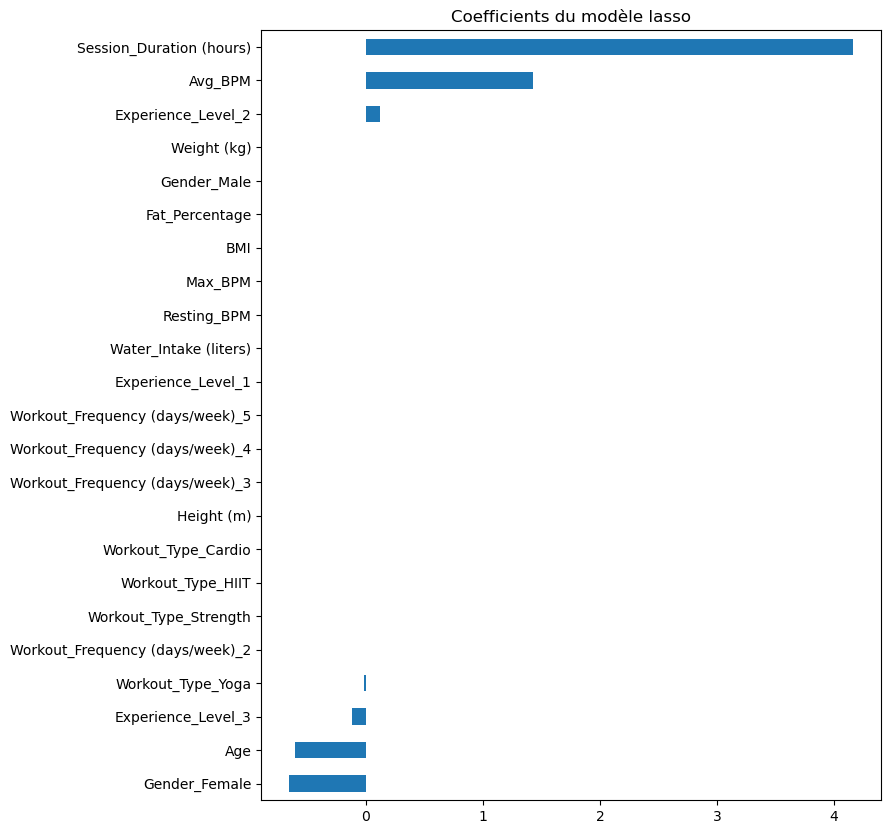

In [59]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

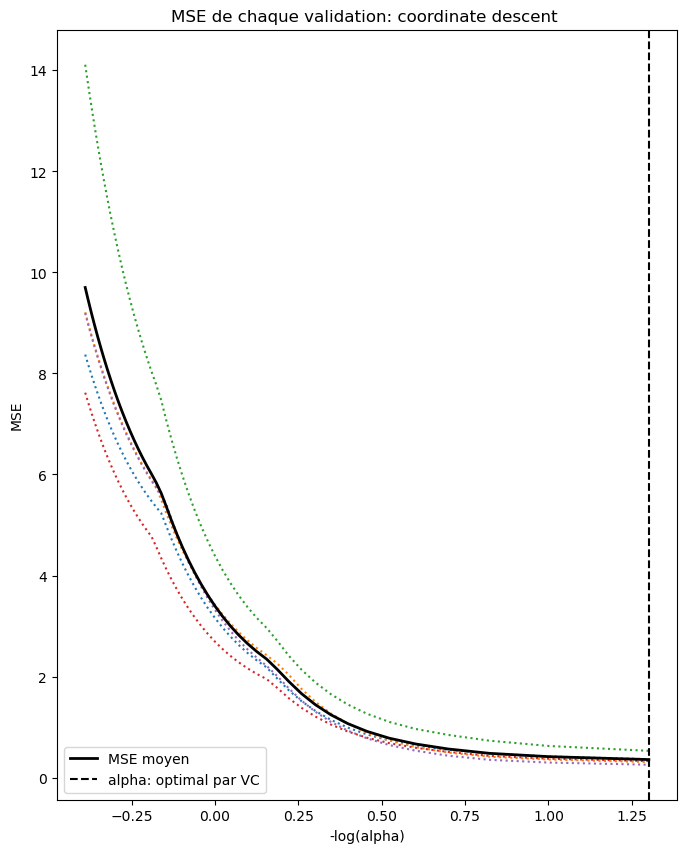

In [50]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(Xc_train,Yc_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()

plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

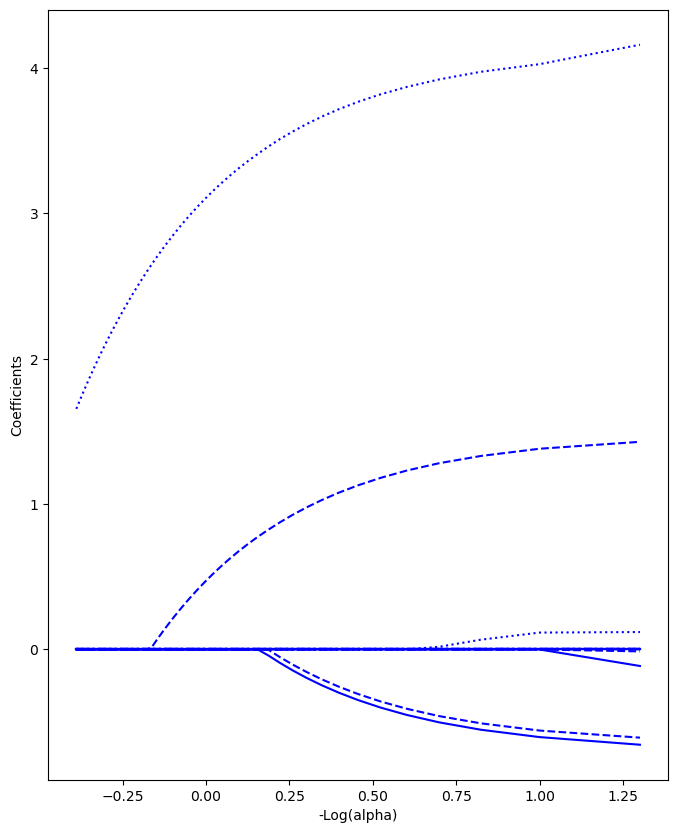

In [52]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(Xc_train,Yc_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()